In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<AxesSubplot:>

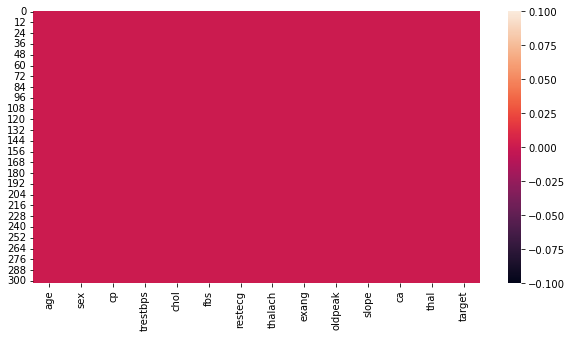

In [4]:
plt.figure(figsize = (10,5))
sns.heatmap(df.isnull())

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
gender = df['sex']

In [8]:
gender = pd.DataFrame(gender)
gender['sex'] = gender['sex'].replace(to_replace = [1,0], value = ['Male','Female'])

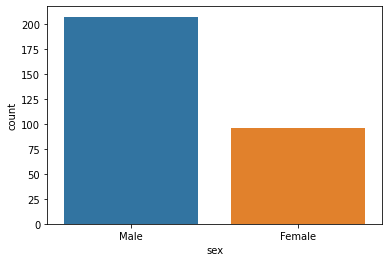

In [9]:
sns.countplot(data = gender, x = 'sex');

<AxesSubplot:>

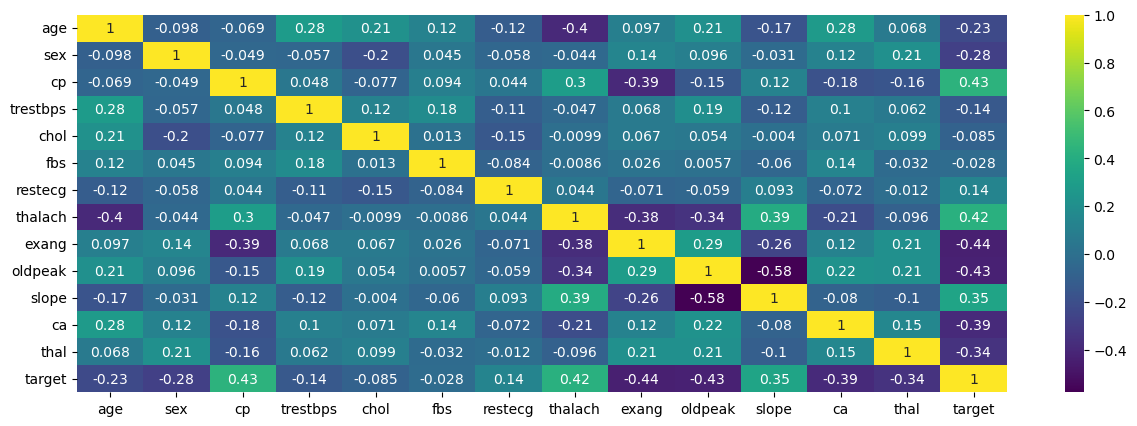

In [10]:
plt.figure(figsize = (15,5), dpi = 100)
sns.heatmap(df.corr(), annot = True, cmap = 'viridis')

In [11]:
df.corr()['target'].sort_values()

exang      -0.436757
oldpeak    -0.430696
ca         -0.391724
thal       -0.344029
sex        -0.280937
age        -0.225439
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
slope       0.345877
thalach     0.421741
cp          0.433798
target      1.000000
Name: target, dtype: float64

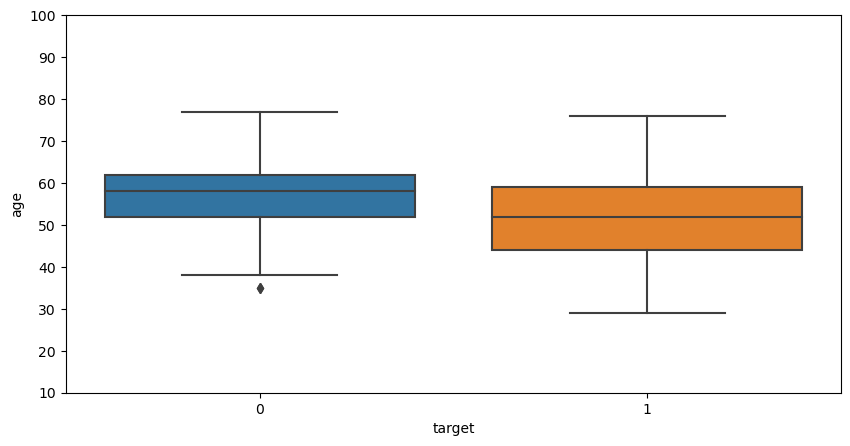

In [12]:
plt.figure(figsize = (10,5), dpi = 100)
sns.boxplot(data = df, x = 'target', y = 'age')
plt.ylim(10, 100);

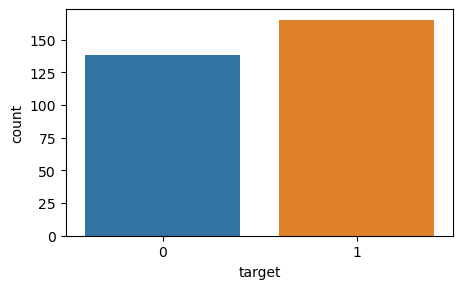

In [13]:
plt.figure(figsize = (5,3), dpi = 100)
sns.countplot(data = df, x = 'target');

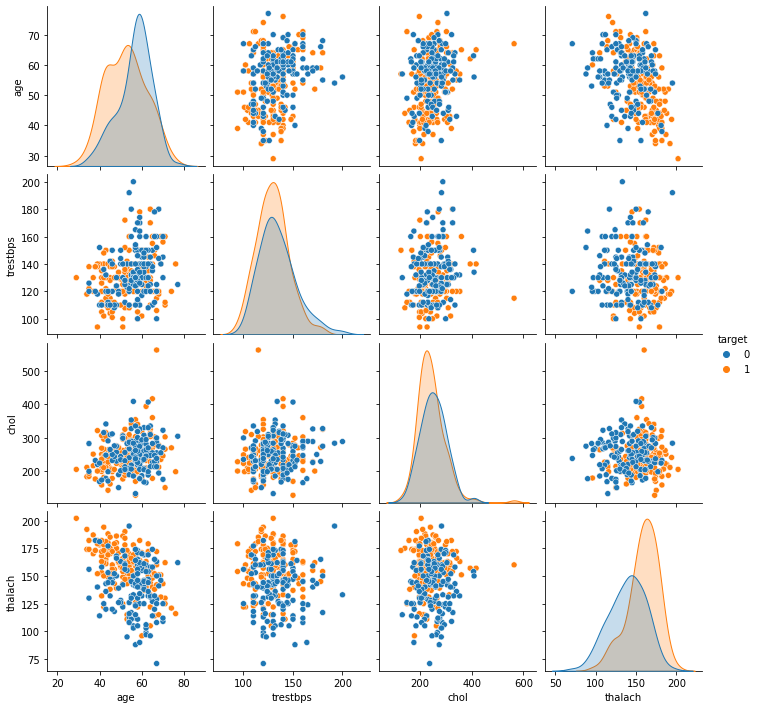

In [15]:
sns.pairplot(df[['age','trestbps', 'chol','thalach', 'target']], hue ='target');

In [16]:
X = df.drop('target',axis =1)

In [17]:
y = df['target']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [19]:
scaler = StandardScaler()

In [20]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
log_model = LogisticRegression()

In [22]:
c = np.linspace(0,1,10)

In [23]:
param = {'C':c}

In [24]:
grid_model = GridSearchCV(estimator = log_model, param_grid = param)

In [25]:
import warnings
warnings.simplefilter('ignore')

In [26]:
grid_model.fit(X_train_scaled, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])})

In [27]:
grid_model.get_params()

{'cv': None,
 'error_score': nan,
 'estimator__C': 1.0,
 'estimator__class_weight': None,
 'estimator__dual': False,
 'estimator__fit_intercept': True,
 'estimator__intercept_scaling': 1,
 'estimator__l1_ratio': None,
 'estimator__max_iter': 100,
 'estimator__multi_class': 'auto',
 'estimator__n_jobs': None,
 'estimator__penalty': 'l2',
 'estimator__random_state': None,
 'estimator__solver': 'lbfgs',
 'estimator__tol': 0.0001,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': LogisticRegression(),
 'n_jobs': None,
 'param_grid': {'C': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
         0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [28]:
grid_model.best_params_

{'C': 0.4444444444444444}

In [29]:
og_model = LogisticRegression(C=0.44444 )

In [30]:
og_model.fit(X_train_scaled, y_train)

LogisticRegression(C=0.44444)

In [31]:
'''from sklearn.linear_model import LogisticRegressionCV
log_model1 = LogisticRegressionCV()
log_model1.fit(X_train_scaled, y_train)
log_model1.C_
log_model1.coef_'''

'from sklearn.linear_model import LogisticRegressionCV\nlog_model1 = LogisticRegressionCV()\nlog_model1.fit(X_train_scaled, y_train)\nlog_model1.C_\nlog_model1.coef_'

In [32]:
coeff = og_model.coef_

In [33]:
y_pred = og_model.predict(X_test_scaled)

In [34]:
accuracy_score(y_test, y_pred)

0.8387096774193549

In [35]:
confusion_matrix(y_test, y_pred)

array([[12,  3],
       [ 2, 14]], dtype=int64)

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



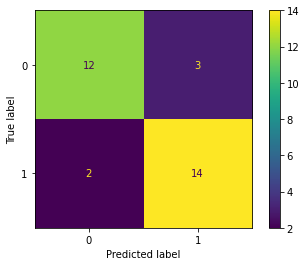

In [37]:
plot_confusion_matrix(grid_model,X_test_scaled,y_test);

In [38]:
coeff = og_model.coef_

In [39]:
coeff = coeff.reshape(-1)

In [40]:
coeff = pd.DataFrame(coeff)

In [41]:
coeff.columns = ['coeff_values']
coeff.index = df.columns[0:13]

In [42]:
coeff

,coeff_values
age,-0.077135
sex,-0.684348
cp,0.844244
trestbps,-0.243827
chol,-0.190520
fbs,0.044789
restecg,0.114875
thalach,0.413332
exang,-0.417962
oldpeak,-0.504687


In [43]:
coeff.sort_values(by = 'coeff_values', inplace= True)

In [44]:
coeff

,coeff_values
ca,-0.801965
sex,-0.684348
thal,-0.549158
oldpeak,-0.504687
exang,-0.417962
trestbps,-0.243827
chol,-0.190520
age,-0.077135
fbs,0.044789
restecg,0.114875


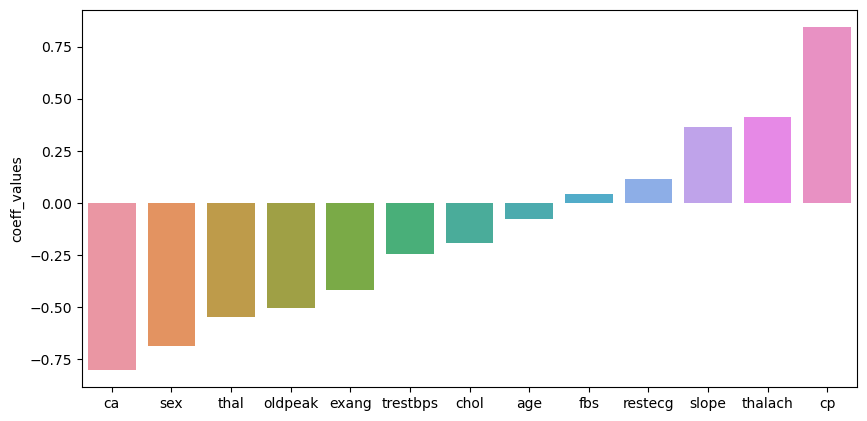

In [51]:
plt.figure(figsize =(10,5), dpi = 100)
sns.barplot(data = coeff, x = coeff.index, y = 'coeff_values');

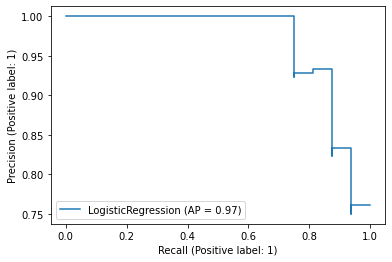

In [58]:
plot_precision_recall_curve(og_model,X_test_scaled, y_test)

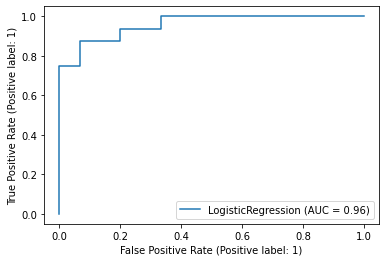

In [59]:
plot_roc_curve(og_model,X_test_scaled, y_test)

In [65]:
patient = [[48.0, 0.0, 2.0, 130.0, 275.0, 0.0, 1.0, 139.0, 0.0, 0.2, 2.0, 0.0, 2.0]]
scaler.transform(patient)

array([[-0.68334197, -1.43393855,  1.00431346, -0.09843371,  0.54636564,
        -0.42732739,  0.89828426, -0.48143181, -0.6799747 , -0.7000699 ,
         0.9451068 , -0.71422572, -0.4842146 ]])

In [67]:
og_model.predict(patient)

array([0], dtype=int64)

In [68]:
og_model.predict_proba(patient)

array([[1.00000000e+00, 3.01349625e-13]])

In [95]:
df.iloc[:,0:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
